<a href="https://colab.research.google.com/github/KwonDoRyoung/AdvancedBasicEducationProgram/blob/main/Challenge01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [14]:
import os
import csv

root_path = "/content/drive/MyDrive/aihub30754" # 데이터가 존재하는 최상위 폴더

metadata_train_path = os.path.join(root_path, "train/train.csv") # 메타데이터의 경로
print(metadata_train_path)

dataset = [] # meta 데이터에서 정보를 추출 후, 저장
category = set() # 집합: Category 정보를 담기 위함

# csv 파일을 읽고(reader) 각각 행에 있는 정보를 순차적으로 호출(for 부분)
with open(metadata_train_path, "r") as f:
  reader = csv.reader(f)
  for idx, row in enumerate(reader):
    if idx == 0:
      # 1 행은 데이터 분류에 대한 정보
      continue
    # row[0]: 이미지 파일 이름
    # row[1]: 이미지 Class
    dataset.append(row)
    category.add(row[-1]) # category=label=class

print(len(dataset), len(category))
print(category)
print(dataset)

/content/drive/MyDrive/aihub30754/train/train.csv
7187 10
{'eel fish trap', 'other objects', 'rectangular fish trap', 'spring fish trap', 'bundle of ropes', 'circular fish trap', 'rope', 'tire', 'fish net', 'wood'}
[['ar5mYOXgdksfSMq.jpg', 'bundle of ropes'], ['8VBdJGJuHnmdPQl.jpg', 'bundle of ropes'], ['4q9ye5hv4TpYZSS.jpg', 'bundle of ropes'], ['fFqa0sGkupAm8dH.jpg', 'bundle of ropes'], ['q01gmInLatmG6Y7.jpg', 'bundle of ropes'], ['U1udEcQBowgglWB.jpg', 'bundle of ropes'], ['Dmjl87NM4tnNL96.jpg', 'bundle of ropes'], ['6G4IkBZXTAwY10G.jpg', 'bundle of ropes'], ['Z7XTfkM7jvrKm5A.jpg', 'bundle of ropes'], ['GYAaNKJBUN8jJCW.jpg', 'bundle of ropes'], ['XbhFkZbJDmKrZuU.jpg', 'bundle of ropes'], ['rzZDxXGfdxUG7k7.jpg', 'bundle of ropes'], ['AnJOzxubwWioudk.jpg', 'bundle of ropes'], ['vRgGMVdHaas2y4D.jpg', 'bundle of ropes'], ['nVEyPPayHWb9Q7B.jpg', 'bundle of ropes'], ['Gr494ABX9FTWYdO.jpg', 'bundle of ropes'], ['HtQWinku3AJB7T6.jpg', 'bundle of ropes'], ['uwwLl9UMXPH1snl.jpg', 'bundle of r

In [51]:
import os
import csv
from PIL import Image
from torch.utils.data import Dataset

class SeaGarbage(Dataset):
  def __init__(self, data_path, phase="train"):
    self.phase = phase
    self.data_path = data_path
    self.dataset, self.category = self._read_metadata(data_path, phase)
    self.classes = list(self.category.keys())

  def __len__(self):
    return len(self.dataset)

  def _read_metadata(self, data_path, phase):
    dataset = []
    category = set()
    metadata_path = os.path.join(data_path, f"{phase}.csv")
    with open(metadata_path, "r") as f:
      reader = csv.reader(f)
      for idx, row in enumerate(reader):
        if idx == 0:
          # 1 행은 데이터 분류에 대한 정보
          continue
        # row[0]: 이미지 파일 이름
        # row[1]: 이미지 Class
        dataset.append(row)
        category.add(row[-1]) # category=label=class
    
    category_dict = {}
    for _c, _n in enumerate(list(category)):
      category_dict[_n] = _c
    return dataset, category_dict

  def __getitem__(self, idx):
    image_path = os.path.join(self.data_path, "images", self.dataset[idx][0])
    image = Image.open(image_path)
    label = self.category[self.dataset[idx][-1]]
    
    return image, label


# of dataset: 7187
class: ['eel fish trap', 'other objects', 'rectangular fish trap', 'spring fish trap', 'bundle of ropes', 'circular fish trap', 'rope', 'tire', 'fish net', 'wood']


Text(0.5, 1.0, 'bundle of ropes')

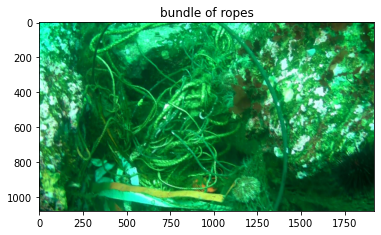

In [52]:
root_path = "/content/drive/MyDrive/aihub30754"
train_path = os.path.join(root_path, "train")

train_dataset1 = SeaGarbage(train_path, phase="train")
print(f"# of dataset: {len(train_dataset1)}")
print(f"class: {train_dataset1.classes}")

img, label = train_dataset1[0]
plt.imshow(img)
plt.title(train_dataset1.classes[label])

In [15]:
# from genericpath import exists
# import os
# import csv
# import shutil

# root_path = "/content/drive/MyDrive/aihub30754" # 데이터가 존재하는 최상위 폴더

# metadata_train_path = os.path.join(root_path, "train/train.csv") # 메타데이터의 경로
# print(metadata_train_path)

# os.makedirs(os.path.join(root_path, "train/image_with_class"), exist_ok=True)

# # csv 파일을 읽고(reader) 각각 행에 있는 정보를 순차적으로 호출(for 부분)
# with open(metadata_train_path, "r") as f:
#   reader = csv.reader(f)
#   for idx, row in enumerate(reader):
#     if idx == 0:
#       # 1 행은 데이터 분류에 대한 정보
#       continue
#     if not os.path.exists(os.path.join(root_path, f"train/image_with_class/{row[-1]}")):
#       os.makedirs(os.path.join(root_path, f"train/image_with_class/{row[-1]}"), exist_ok=True)
#     shutil.copyfile(os.path.join(root_path, f"train/images/{row[0]}"), os.path.join(root_path, f"train/image_with_class/{row[-1]}/{row[0]}"))

/content/drive/MyDrive/aihub30754/train/train.csv


# of dataset: 7187
class: ['bundle of ropes', 'circular fish trap', 'eel fish trap', 'fish net', 'other objects', 'rectangular fish trap', 'rope', 'spring fish trap', 'tire', 'wood']


Text(0.5, 1.0, 'bundle of ropes')

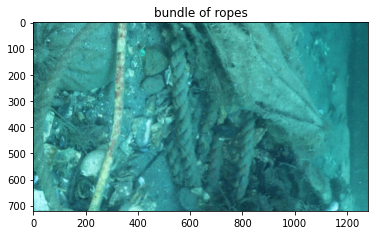

In [22]:
import matplotlib.pyplot as plt
from torchvision.datasets import ImageFolder

root_path = "/content/drive/MyDrive/aihub30754"
train_path = os.path.join(root_path, "train/image_with_class")

train_dataset2 = ImageFolder(train_path)

print(f"# of dataset: {len(train_dataset2)}")
print(f"class: {train_dataset2.classes}")

img, label = train_dataset2[0]
plt.imshow(img)
plt.title(train_dataset2.classes[label])
